**Run the following two cells before you begin.**

In [8]:
%autosave 10

Autosaving every 10 seconds


In [9]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [10]:
# Import the data set
df = pd.read_csv('D:\EDUCATION\Internship_DataScience\Task_1\Data_Exploration_and_Cleaning\cleaned_data.csv')

In [11]:
# Define the sigmoid function
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

Text(0.5, 1.0, 'The sigmoid function')

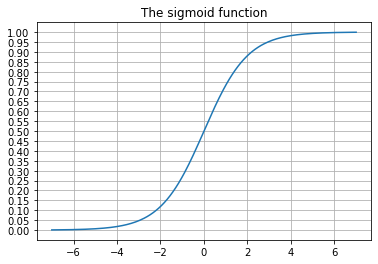

In [12]:
X_sig = np.linspace(-7,7,212)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,21))
plt.grid()
plt.title('The sigmoid function')

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [13]:
# Create a train/test split
X = df[['PAY_1','LIMIT_BAL']]
y= df['default payment next month']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.solver='liblinear'

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [17]:
# Fit the logistic regression model on training data
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [18]:
# Make predictions using `.predict()`
y_pred = model.predict(X_test)

In [19]:
# Find class probabilities using `.predict_proba()`
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [20]:
# Add column of 1s to features
model.coef_

array([[ 8.27451187e-11, -6.80876727e-06]])

In [21]:
# Get coefficients and intercepts from trained model
theta_1 = model.coef_[0][0]
theta_2 = model.coef_[0][1]
theta_0 = model.intercept_

In [23]:
# Manually calculate predicted probabilities
temp = theta_0 + theta_1*X_test['PAY_1'] + theta_2*X_test['LIMIT_BAL']
predicted_probabilities = sigmoid(temp)
predicted_probabilities

14306    0.251731
2978     0.415703
16641    0.203955
18580    0.203955
131      0.415703
           ...   
18160    0.278236
19779    0.415703
6666     0.415703
18990    0.172785
23253    0.336066
Length: 5333, dtype: float64

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [25]:
# Manually calculate predicted classes
threshold_mask = predicted_probabilities>=0.5
final_pred = []
for i in threshold_mask:
    if i==True:
        final_pred.append(1)
    else:
        final_pred.append(0)
final_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [27]:
# Compare to scikit-learn's predicted classes
model.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [28]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
ROC_AUC_SCORE = metrics.roc_auc_score(y_test,y_pred_proba[:,1])
ROC_AUC_SCORE

0.627207450280691

In [33]:
# Use manually calculated predicted probabilities to calculate ROC AUC
ROC_AUC_SCORE_1= metrics.roc_auc_score(y_test,predicted_probabilities)
ROC_AUC_SCORE_1

0.627207450280691